# Contours & Edge Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "../All_data_sets/dataset"

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 'dog_1.jpeg',
 'dog_2.jpeg',
 'dog_3.jpg',
 'dog_4.jpg',
 'mb_1.jpeg',
 'mb_2.jpeg',
 'pichuka_1.jpeg',
 'pichuka_2.jpeg',
 'pichuka_3.jpeg']

In [4]:
def display(img):
    
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [5]:
image = cv2.imread( path+'/mb_2.jpeg' )

# Edge Detection with Canny

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur (reduces noise)
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Canny Edge Detection
edges = cv2.Canny(blurred, 100, 200)

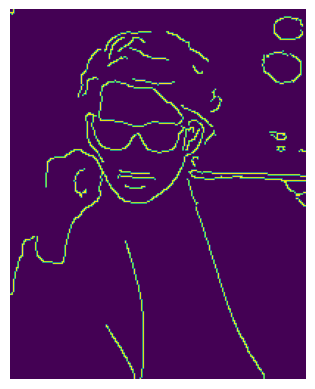

In [7]:
display(edges)

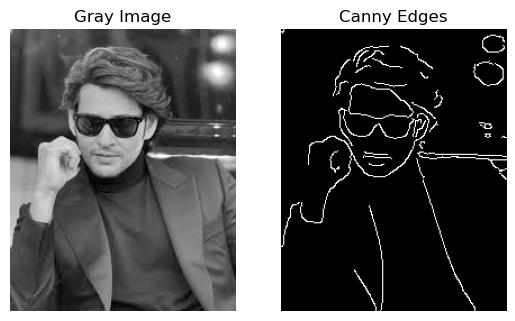

In [8]:
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title("Gray Image")
plt.axis('off')

plt.subplot(1,2,2), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.axis('off')

plt.show()

# Finding Contours

In [9]:
# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_img = image.copy()

cv2.drawContours(contour_img, contours, -1, (0,255,0), 2)

array([[[194, 203, 212],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [121, 137, 143],
        [120, 136, 142],
        [119, 135, 142]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [104, 120, 126],
        [103, 119, 125],
        [102, 118, 125]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 89, 105, 111],
        [ 88, 104, 110],
        [ 89, 105, 111]],

       ...,

       [[ 52,  61,  71],
        [ 54,  63,  73],
        [ 49,  58,  68],
        ...,
        [104, 116, 134],
        [100, 112, 130],
        [ 88, 100, 118]],

       [[ 55,  64,  74],
        [ 56,  65,  75],
        [ 51,  60,  70],
        ...,
        [104, 116, 134],
        [ 99, 111, 129],
        [ 88, 100, 118]],

       [[ 58,  67,  77],
        [ 59,  68,  78],
        [ 54,  63,  73],
        ...,
        [103, 115, 133],
        [ 98, 110, 128],
        [ 89, 101, 119]]

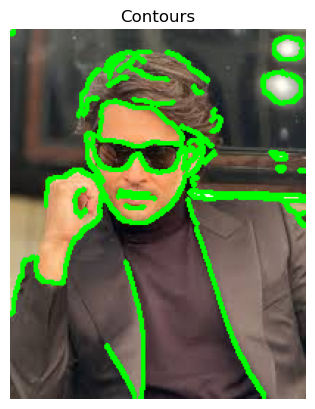

In [10]:
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis('off')
plt.show()

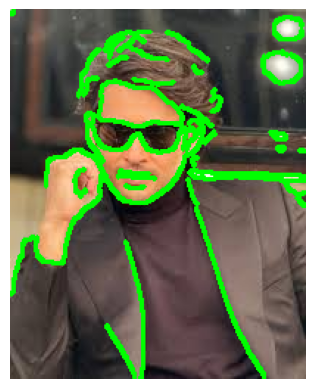

In [11]:
display(cv2.cvtColor(contour_img , cv2.COLOR_BGR2RGB))

In [12]:
print(f"Number of contours found: {len(contours)}")

Number of contours found: 37


# Step 1: Bounding Rectangle

In [13]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(contour_img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue rectangle


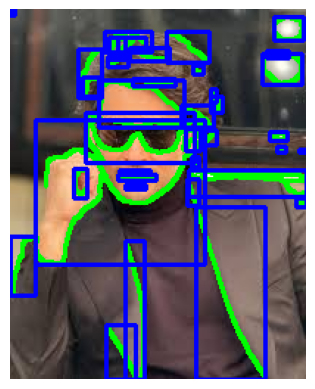

In [14]:
display( cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))

# Step 2: Minimum Enclosing Circle

In [15]:
for cnt in contours:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(contour_img, center, radius, (0, 255, 255), 2)  # Yellow circle


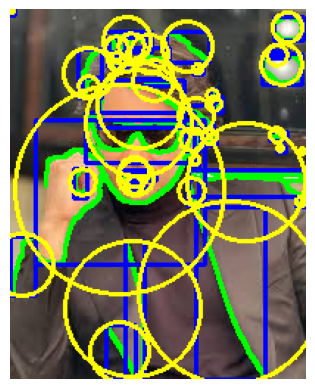

In [16]:
display( cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))

# Step 3: Polygon Approximation

In [17]:
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)  # precision factor
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(contour_img, [approx], 0, (255, 0, 255), 2)  # Pink polygon


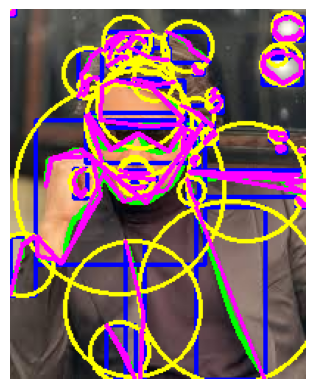

In [18]:
display( cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))

# Contour Area Filter

In [19]:
min_area = 500   # ignore contours smaller than this
max_area = 5000  # optional upper limit

filtered_img = image.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_area and area < max_area:
        cv2.drawContours(filtered_img, [cnt], -1, (0, 255, 0), 2)


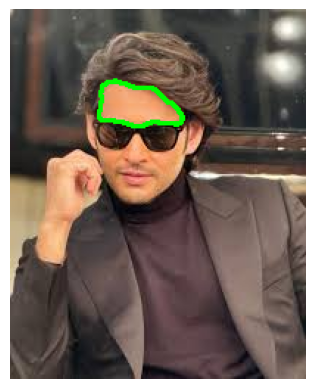

In [20]:
 display( cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))

# Bounding Box on Filtered Contours

In [21]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_area and area < max_area:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(filtered_img, (x, y), (x+w, y+h), (255, 0, 0), 2)


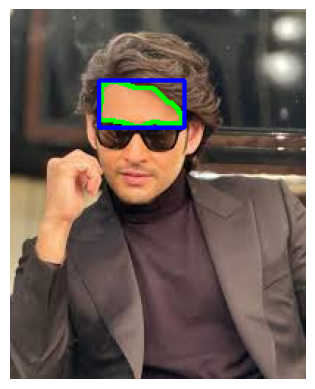

In [22]:
display( cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))